In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
#import analyse_sampling_dataset

# DataSet preparation (preprocessing + sampling)

In [2]:
df = pd.read_csv('/home/jbara/Desktop/thesis/thesis/DATASET/US Company Bankruptcy Prediction Dataset/american_bankruptcy.csv')

In [3]:
#rename the target to 'class_label
df.rename(columns={'status_label': 'class_label'}, inplace=True)

In [4]:
df.shape

(78682, 21)

In [5]:
df = df.drop(columns=['company_name', 'year'])

In [6]:
df['class_label'] = df['class_label'].replace({'alive': 0, 'failed': 1})

In [7]:
# Print the imbalance ratio in the dataset
count = df['class_label'].value_counts()
imbalance_ratio = count.max() / count.min()
print("Imbalance ratio:", imbalance_ratio)

Imbalance ratio: 14.073180076628352


In [8]:
count

class_label
0    73462
1     5220
Name: count, dtype: int64

In [9]:
# Define features and target variable
X = df.drop(columns=['class_label'])
y = df['class_label']

In [10]:
# Perform stratified sampling
X_train, X_subset, y_train, y_subset = train_test_split(X, y, test_size=0.01, stratify=y, random_state=42)

In [11]:
# Preparing the subset that we will consider as the datase
X_subset.reset_index(drop=True, inplace=True)
y_subset.reset_index(drop=True, inplace=True)

In [12]:
# Concatenate features and labels into a single DataFrame
df_train = pd.concat([X_subset, y_subset], axis=1).reset_index(drop=True)

In [13]:
count2 = df_train['class_label'].value_counts()
count2

class_label
0    735
1     52
Name: count, dtype: int64

In [14]:
386*35

13510

In [15]:
52*52

2704

In [16]:
(735*5)/2704

1.3590976331360947

In [17]:
def columns_of_concatenated_ds(df_train):
    c = list(df_train.columns.drop(['class_label']))
    columns = c + [e + '_N' for e in c] + ['class_label']
    return columns

In [18]:
columns = columns_of_concatenated_ds(df_train)

# Concatenated Datasets generation

In [19]:
config_GA = {
    'pop_size': 100,
    'individual_size': 5,
    'num_generations': 10,
    'mutation_rate': 0.05,
    'crossover_type': 'two-point',
    'stagnation_limit': 7  # Number of generations with no improvement
}

## Random selection of Set_N

In [20]:
import Set_N_random_selection
train_C_random = Set_N_random_selection.main(df_train, columns, config_GA)

## Weighted selection of Set_N

In [21]:
import Set_N_weighted_selection
train_C_weighted = Set_N_weighted_selection.main(df_train, columns, config_GA)

## Fix the initial conditions for the GA algorithm

In [22]:
 import select_potential_indecies
import initial_population
N = df_train[df_train['class_label'] == df_train['class_label'].value_counts().idxmax()].reset_index(drop=True)
potential_indices = select_potential_indecies.weight_calculation(df_train, N)

population = initial_population.initialize_population(config_GA['pop_size'],
                                                          potential_indices,
                                                          config_GA['individual_size'])



## GA1

2024-05-28 22:21:48,848 - INFO - Initializing GA with population size: 100
2024-05-28 22:22:50,988 - INFO - New best fitness found: 0.003621
2024-05-28 22:22:50,989 - INFO - Generation 0 complete. Best fitness: 0.003621


time taken in generation 0 : 62.1406 seconds


2024-05-28 22:23:53,277 - INFO - New best fitness found: 0.002917
2024-05-28 22:23:53,278 - INFO - Generation 1 complete. Best fitness: 0.002917


time taken in generation 1 : 62.2886 seconds


2024-05-28 22:24:55,516 - INFO - Generation 2 complete. Best fitness: 0.002917


time taken in generation 2 : 62.2381 seconds


2024-05-28 22:25:55,813 - INFO - Generation 3 complete. Best fitness: 0.002917


time taken in generation 3 : 60.2963 seconds


2024-05-28 22:26:54,952 - INFO - New best fitness found: 0.002247
2024-05-28 22:26:54,953 - INFO - Generation 4 complete. Best fitness: 0.002247


time taken in generation 4 : 59.1393 seconds


2024-05-28 22:27:48,577 - INFO - New best fitness found: 0.001272
2024-05-28 22:27:48,577 - INFO - Generation 5 complete. Best fitness: 0.001272


time taken in generation 5 : 53.6237 seconds


2024-05-28 22:28:41,228 - INFO - New best fitness found: 0.000994
2024-05-28 22:28:41,229 - INFO - Generation 6 complete. Best fitness: 0.000994


time taken in generation 6 : 52.6514 seconds


2024-05-28 22:29:32,346 - INFO - New best fitness found: 0.000474
2024-05-28 22:29:32,347 - INFO - Generation 7 complete. Best fitness: 0.000474


time taken in generation 7 : 51.1177 seconds


2024-05-28 22:30:20,338 - INFO - Generation 8 complete. Best fitness: 0.000474


time taken in generation 8 : 47.9909 seconds


2024-05-28 22:31:02,144 - INFO - Generation 9 complete. Best fitness: 0.000474


time taken in generation 9 : 41.8053 seconds
best_individual, [560, 64, 121, 102, 715]
Set_N             X1         X2        X3        X4        X5        X6        X7  \
560  19304.900   3916.800  1414.500  7853.600  2283.300  7808.400  3778.900   
64    1301.552    471.770    67.923   411.803   102.454   302.989   248.956   
121  16202.000  33981.000  1485.000  8616.000  5706.000  3527.000  6361.000   
102  17206.000  29832.000   923.000  6262.000  5659.000  3069.000  7240.000   
715   4071.553   9710.342   375.054  2497.097   945.054  1310.284  1000.629   

             X8         X9        X10      X11       X12        X13  \
560  64073.7760  23850.300  47195.700   3943.3  6439.100  19933.500   
64   13101.2851   1397.846   2937.473      0.0   343.880    926.076   
121  66048.6319  54366.000  93837.000  23095.0  7131.000  20385.000   
102  56684.5212  42629.000  45925.000   5935.0  5339.000  12797.000   
715  10348.9392  12700.999   7138.787    922.3  2122.043   2990.657   

     

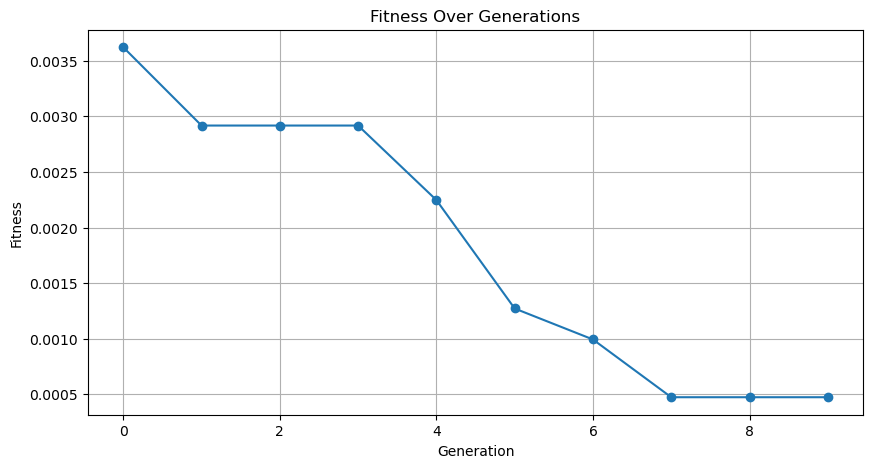

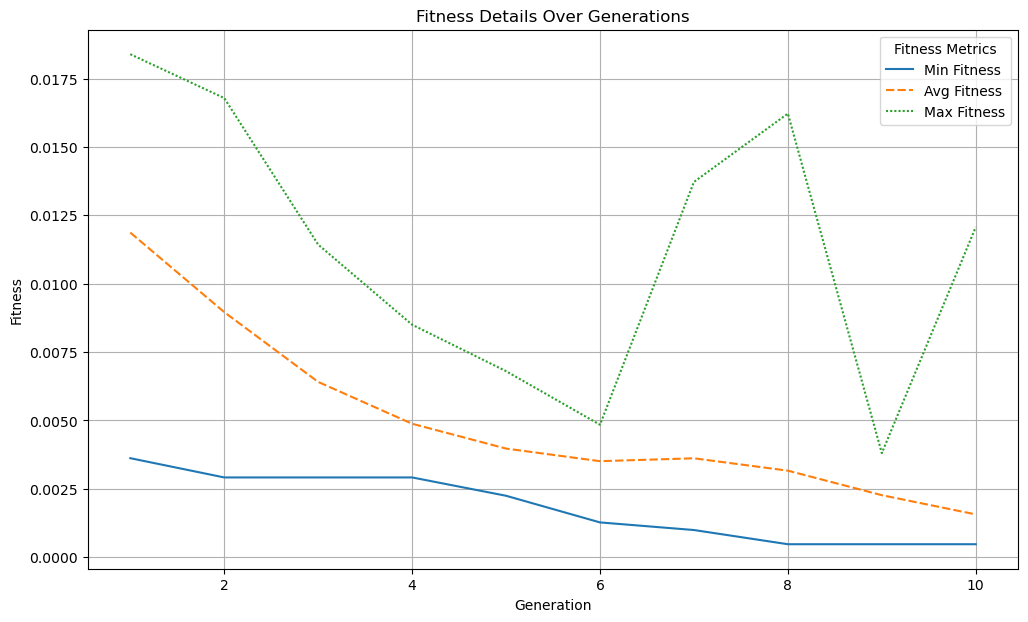

In [23]:
import Set_N_GA
train_C_GA1 = Set_N_GA.main(df_train, columns, config_GA, population, 1)

## GA2

2024-05-28 22:31:02,463 - INFO - Initializing GA with population size: 100
2024-05-28 22:32:02,954 - INFO - New best fitness found: 0.003621
2024-05-28 22:32:02,954 - INFO - Generation 0 complete. Best fitness: 0.003621


time taken in generation 0 : 60.4909 seconds


2024-05-28 22:33:01,953 - INFO - Generation 1 complete. Best fitness: 0.003621


time taken in generation 1 : 58.9980 seconds


2024-05-28 22:34:02,472 - INFO - Generation 2 complete. Best fitness: 0.003621


time taken in generation 2 : 60.5184 seconds


2024-05-28 22:35:05,970 - INFO - New best fitness found: 0.003039
2024-05-28 22:35:05,971 - INFO - Generation 3 complete. Best fitness: 0.003039


time taken in generation 3 : 63.4982 seconds


2024-05-28 22:36:07,524 - INFO - New best fitness found: 0.002956
2024-05-28 22:36:07,524 - INFO - Generation 4 complete. Best fitness: 0.002956


time taken in generation 4 : 61.5530 seconds


2024-05-28 22:37:10,732 - INFO - Generation 5 complete. Best fitness: 0.002956


time taken in generation 5 : 63.2073 seconds


2024-05-28 22:38:07,716 - INFO - Generation 6 complete. Best fitness: 0.002956


time taken in generation 6 : 56.9830 seconds


2024-05-28 22:39:07,346 - INFO - New best fitness found: 0.002686
2024-05-28 22:39:07,347 - INFO - Generation 7 complete. Best fitness: 0.002686


time taken in generation 7 : 59.6305 seconds


2024-05-28 22:40:08,743 - INFO - Generation 8 complete. Best fitness: 0.002686


time taken in generation 8 : 61.3957 seconds


2024-05-28 22:41:10,055 - INFO - New best fitness found: 0.002246
2024-05-28 22:41:10,056 - INFO - Generation 9 complete. Best fitness: 0.002246


time taken in generation 9 : 61.3124 seconds
best_individual, [502, 78, 121, 360, 716]
Set_N             X1         X2        X3        X4        X5        X6        X7  \
502   1521.086   2387.736    73.469   336.668   440.736   227.695   426.642   
78     296.335    316.672     8.962    50.950     0.000    29.660   119.224   
121  16202.000  33981.000  1485.000  8616.000  5706.000  3527.000  6361.000   
360    281.280     97.051     4.278   -75.714     0.000   -91.407    14.382   
716    198.584    103.640     2.365    -1.097     0.000    -5.430    59.179   

             X8         X9        X10        X11       X12        X13  \
502   3019.1832   3273.259   2840.355      0.430   263.199    885.523   
78     801.2160    450.375    364.711      0.000    41.988    133.703   
121  66048.6319  54366.000  93837.000  23095.000  7131.000  20385.000   
360   1334.3756     21.337    339.275     57.748   -79.992    -75.714   
716    992.1630    177.667    208.449      0.000    -3.462     74.0

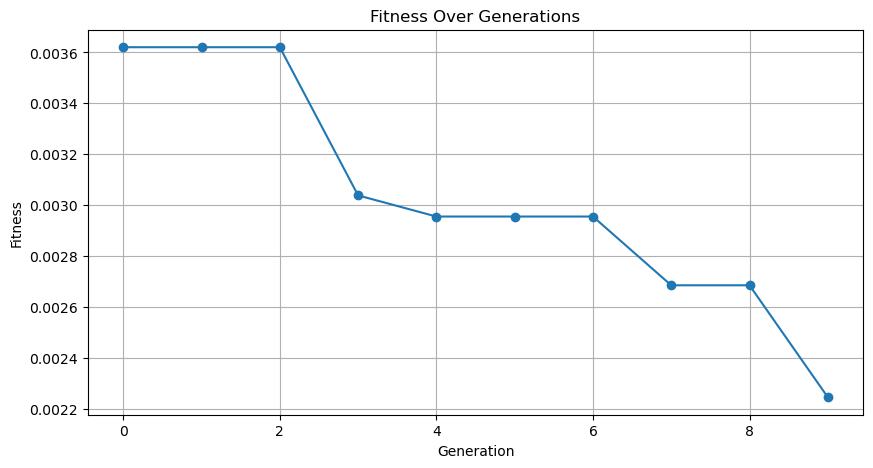

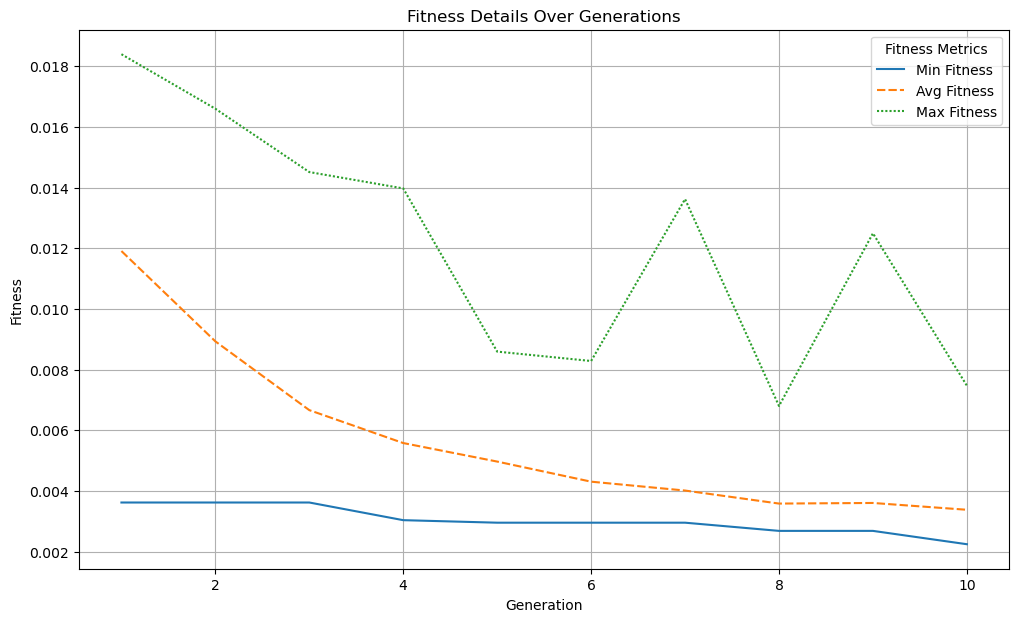

In [24]:
train_C_GA2 = Set_N_GA.main(df_train, columns, config_GA, population, 2)

## GA3

2024-05-28 22:41:10,362 - INFO - Initializing GA with population size: 100
2024-05-28 22:42:13,819 - INFO - New best fitness found: 0.003621
2024-05-28 22:42:13,820 - INFO - Generation 0 complete. Best fitness: 0.003621


time taken in generation 0 : 63.4569 seconds


2024-05-28 22:43:18,426 - INFO - New best fitness found: 0.001678
2024-05-28 22:43:18,427 - INFO - Generation 1 complete. Best fitness: 0.001678


time taken in generation 1 : 64.6063 seconds


2024-05-28 22:44:20,407 - INFO - Generation 2 complete. Best fitness: 0.001678


time taken in generation 2 : 61.9795 seconds


2024-05-28 22:45:16,483 - INFO - New best fitness found: 0.001268
2024-05-28 22:45:16,483 - INFO - Generation 3 complete. Best fitness: 0.001268


time taken in generation 3 : 56.0757 seconds


2024-05-28 22:46:12,936 - INFO - New best fitness found: 0.000957
2024-05-28 22:46:12,937 - INFO - Generation 4 complete. Best fitness: 0.000957


time taken in generation 4 : 56.4533 seconds


2024-05-28 22:47:01,919 - INFO - Generation 5 complete. Best fitness: 0.000957


time taken in generation 5 : 48.9818 seconds


2024-05-28 22:47:48,376 - INFO - New best fitness found: 0.000696
2024-05-28 22:47:48,377 - INFO - Generation 6 complete. Best fitness: 0.000696


time taken in generation 6 : 46.4572 seconds


2024-05-28 22:48:35,185 - INFO - Generation 7 complete. Best fitness: 0.000696


time taken in generation 7 : 46.8077 seconds


2024-05-28 22:49:22,836 - INFO - Generation 8 complete. Best fitness: 0.000696


time taken in generation 8 : 47.6500 seconds


2024-05-28 22:50:12,543 - INFO - Generation 9 complete. Best fitness: 0.000696


time taken in generation 9 : 49.7060 seconds
best_individual, [661, 54, 513, 468, 64]
Set_N            X1         X2       X3        X4        X5        X6        X7  \
661  5121.000  11684.000  540.000  2464.000  1181.000  1450.000  3017.000   
54   6168.000   2306.000  520.000  2786.000  1618.000  1108.000  1487.000   
513  2599.038  12513.089  105.700  1081.896  2086.874   597.358   137.690   
468  6856.000   2031.000  198.000  1110.000   126.000    76.000  1009.000   
64   1301.552    471.770   67.923   411.803   102.454   302.989   248.956   

             X8         X9        X10      X11       X12        X13       X14  \
661  23850.7718  15165.000  11973.000  3956.00  1924.000   3481.000  3927.000   
54   52388.0627  13691.000  12567.000  3361.00  2266.000  11385.000  3310.000   
513  14017.2657  14873.610  13198.201  8818.75   976.196   2360.521   997.173   
468  17510.5400   5911.000   9865.000  1541.00   912.000   3880.000  3623.000   
64   13101.2851   1397.846   2937.473   

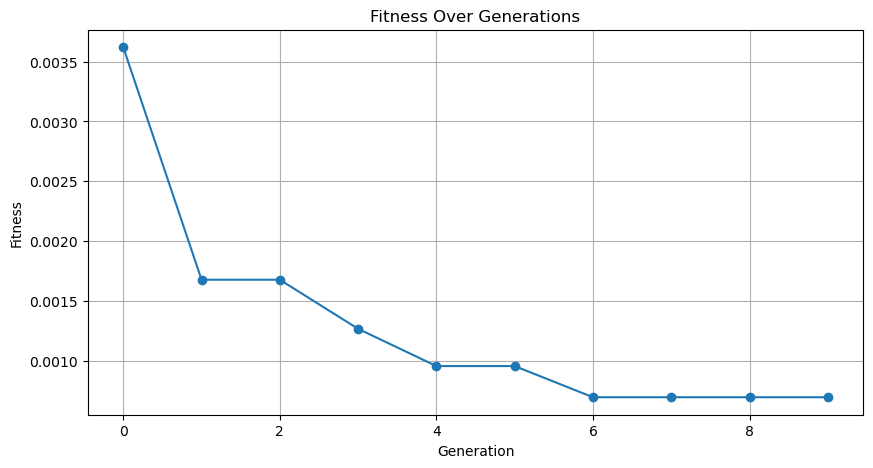

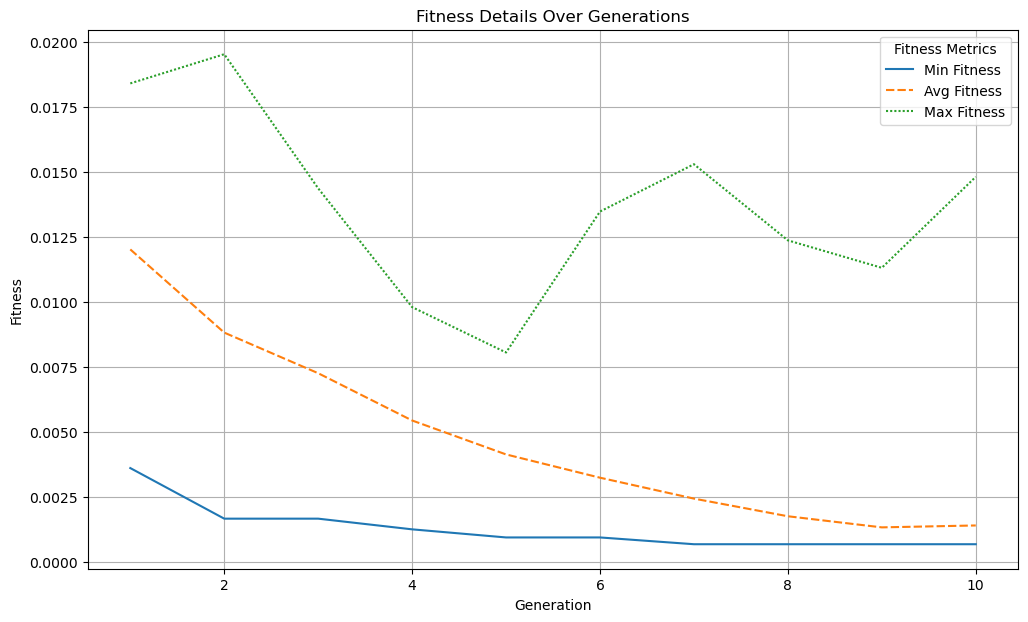

In [25]:
train_C_GA3 = Set_N_GA.main(df_train, columns, config_GA, population, 3)

## GA4

2024-05-28 22:50:12,777 - INFO - Initializing GA with population size: 100
2024-05-28 22:51:17,413 - INFO - New best fitness found: 0.003621
2024-05-28 22:51:17,414 - INFO - Generation 0 complete. Best fitness: 0.003621


time taken in generation 0 : 64.6362 seconds


2024-05-28 22:52:18,043 - INFO - Generation 1 complete. Best fitness: 0.003621


time taken in generation 1 : 60.6290 seconds


2024-05-28 22:53:21,048 - INFO - New best fitness found: 0.003364
2024-05-28 22:53:21,048 - INFO - Generation 2 complete. Best fitness: 0.003364


time taken in generation 2 : 63.0044 seconds


2024-05-28 22:54:27,044 - INFO - Generation 3 complete. Best fitness: 0.003364


time taken in generation 3 : 65.9952 seconds


2024-05-28 22:55:29,305 - INFO - New best fitness found: 0.003160
2024-05-28 22:55:29,306 - INFO - Generation 4 complete. Best fitness: 0.003160


time taken in generation 4 : 62.2613 seconds


2024-05-28 22:56:31,001 - INFO - Generation 5 complete. Best fitness: 0.003160


time taken in generation 5 : 61.6947 seconds


2024-05-28 22:57:31,373 - INFO - New best fitness found: 0.003017
2024-05-28 22:57:31,374 - INFO - Generation 6 complete. Best fitness: 0.003017


time taken in generation 6 : 60.3723 seconds


2024-05-28 22:58:28,823 - INFO - New best fitness found: 0.001233
2024-05-28 22:58:28,823 - INFO - Generation 7 complete. Best fitness: 0.001233


time taken in generation 7 : 57.4491 seconds


2024-05-28 22:59:23,239 - INFO - New best fitness found: 0.000588
2024-05-28 22:59:23,240 - INFO - Generation 8 complete. Best fitness: 0.000588


time taken in generation 8 : 54.4162 seconds


2024-05-28 23:00:15,920 - INFO - Generation 9 complete. Best fitness: 0.000588


time taken in generation 9 : 52.6795 seconds
best_individual, [468, 336, 590, 565, 121]
Set_N             X1         X2        X3        X4      X5        X6        X7  \
468   6856.000   2031.000   198.000  1110.000   126.0    76.000  1009.000   
336   9563.625  15574.259   269.072  3193.455     0.0  1780.656  3662.425   
590   2422.000   4645.000   598.000  1667.000  1084.0   382.000   938.000   
565   3296.000   1672.000   157.000  2210.000     0.0  1156.000   991.000   
121  16202.000  33981.000  1485.000  8616.000  5706.0  3527.000  6361.000   

             X8         X9        X10        X11       X12        X13  \
468  17510.5400   5911.000   9865.000   1541.000   912.000   3880.000   
336  22876.3908  23094.078  12835.253      1.445  2924.383   7519.819   
590   6438.0754   6312.000  17131.000   6863.000  1069.000   1667.000   
565  26143.4160   5313.000   8183.000   3468.000  2053.000   3641.000   
121  66048.6319  54366.000  93837.000  23095.000  7131.000  20385.000   

    

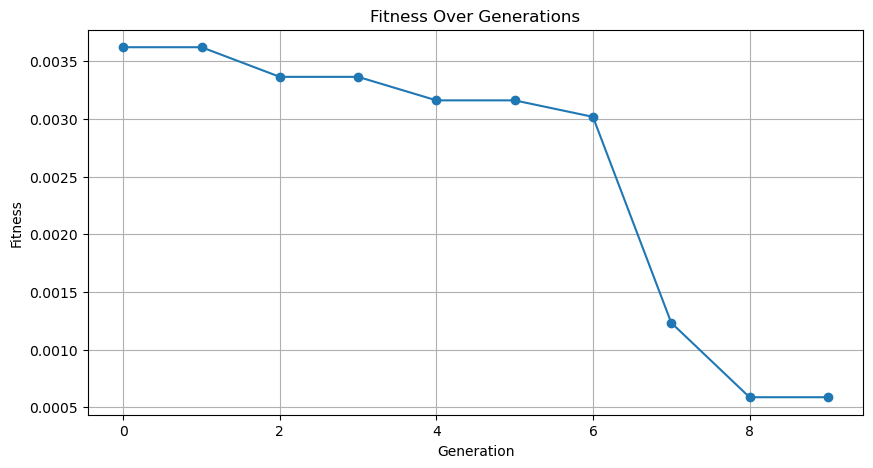

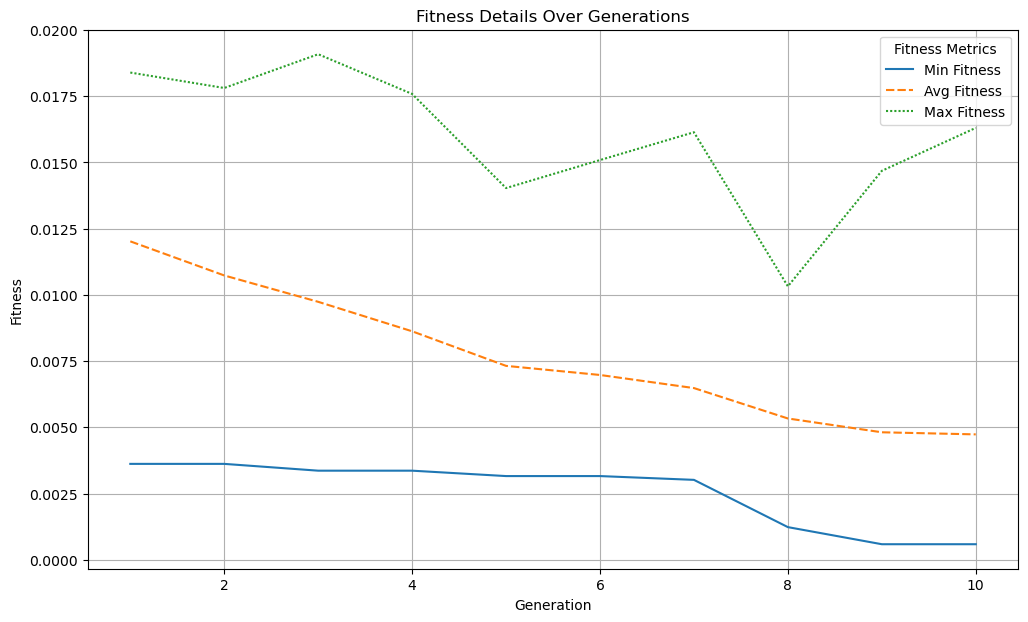

In [26]:
train_C_GA4 = Set_N_GA.main(df_train, columns, config_GA, population, 4)

## GA5

2024-05-28 23:00:16,178 - INFO - Initializing GA with population size: 100
2024-05-28 23:01:19,570 - INFO - New best fitness found: 0.003621
2024-05-28 23:01:19,570 - INFO - Generation 0 complete. Best fitness: 0.003621


time taken in generation 0 : 63.3920 seconds


2024-05-28 23:02:25,128 - INFO - Generation 1 complete. Best fitness: 0.003621


time taken in generation 1 : 65.5567 seconds


2024-05-28 23:03:29,772 - INFO - New best fitness found: 0.003137
2024-05-28 23:03:29,773 - INFO - Generation 2 complete. Best fitness: 0.003137


time taken in generation 2 : 64.6434 seconds


2024-05-28 23:04:35,902 - INFO - New best fitness found: 0.002439
2024-05-28 23:04:35,903 - INFO - Generation 3 complete. Best fitness: 0.002439


time taken in generation 3 : 66.1292 seconds


2024-05-28 23:05:35,578 - INFO - New best fitness found: 0.002213
2024-05-28 23:05:35,579 - INFO - Generation 4 complete. Best fitness: 0.002213


time taken in generation 4 : 59.6759 seconds


2024-05-28 23:06:39,100 - INFO - Generation 5 complete. Best fitness: 0.002213


time taken in generation 5 : 63.5210 seconds


2024-05-28 23:07:42,718 - INFO - Generation 6 complete. Best fitness: 0.002213


time taken in generation 6 : 63.6167 seconds


2024-05-28 23:08:44,959 - INFO - New best fitness found: 0.001395
2024-05-28 23:08:44,959 - INFO - Generation 7 complete. Best fitness: 0.001395


time taken in generation 7 : 62.2400 seconds


2024-05-28 23:09:48,110 - INFO - Generation 8 complete. Best fitness: 0.001395


time taken in generation 8 : 63.1502 seconds


2024-05-28 23:10:53,012 - INFO - Generation 9 complete. Best fitness: 0.001395


time taken in generation 9 : 64.9017 seconds
best_individual, [64, 85, 449, 522, 537]
Set_N            X1        X2       X3        X4       X5       X6       X7  \
64   1301.552   471.770   67.923   411.803  102.454  302.989  248.956   
85    361.161  1418.634  151.593   443.248   72.111  126.188  200.972   
449  2412.044   690.526   61.512   602.063  429.111  217.284  350.294   
522  2399.200  2839.300  189.000   653.200  828.500  274.800  516.600   
537  2112.000  4009.000  272.000  1415.000  728.000  766.000  494.000   

             X8        X9       X10       X11       X12       X13       X14  \
64   13101.2851  1397.846  2937.473     0.000   343.880   926.076   381.130   
85    1583.2045  1861.882  3506.739  1124.335   291.655   443.248   550.090   
449   5251.4297  1611.819  4253.867  1654.932   540.551   921.293   700.535   
522   4668.1372  4055.500  4180.400   481.700   464.200  1216.200   719.900   
537  14745.3600  7343.000  7870.000  2116.000  1143.000  3334.000  2962.00

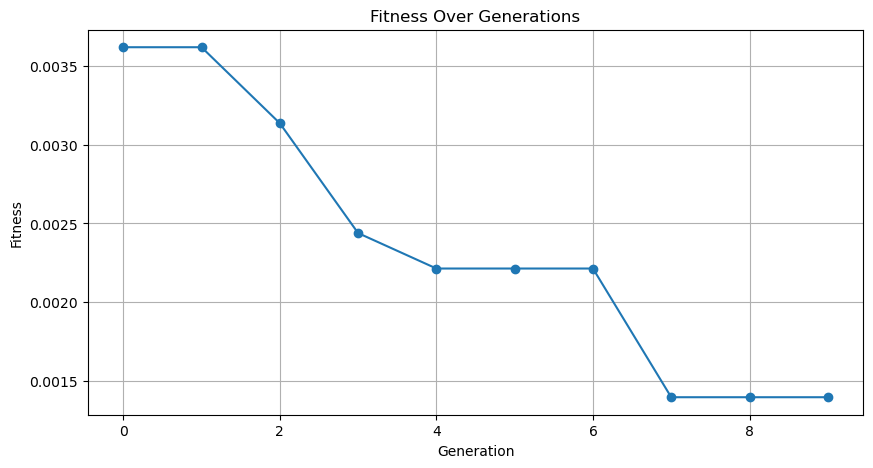

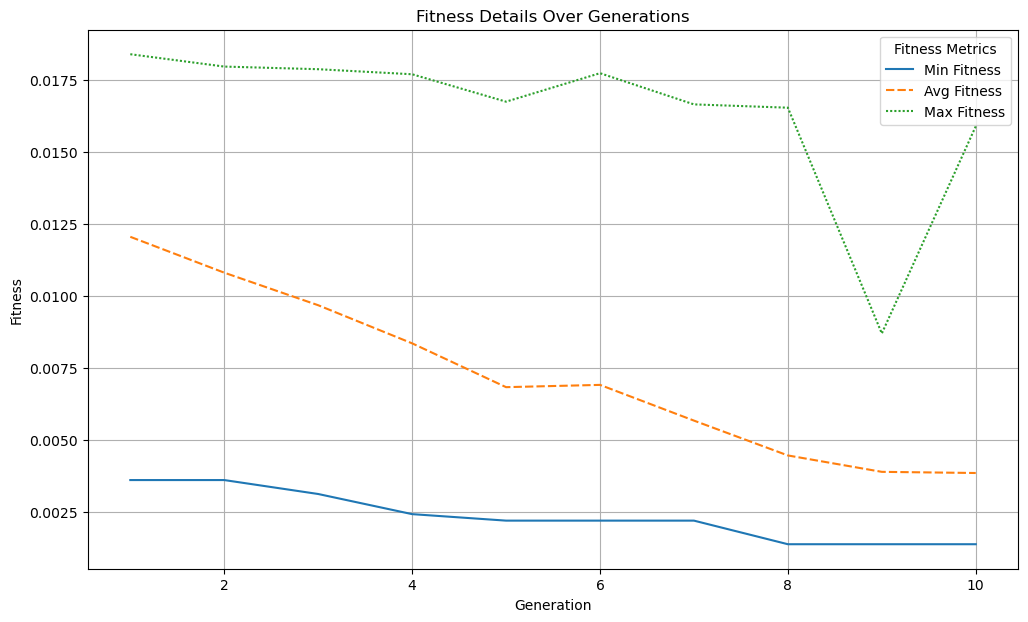

In [27]:
train_C_GA5 = Set_N_GA.main(df_train, columns, config_GA, population, 5)

## GA6

2024-05-28 23:10:53,283 - INFO - Initializing GA with population size: 100
2024-05-28 23:12:00,635 - INFO - New best fitness found: 0.004245
2024-05-28 23:12:00,636 - INFO - Generation 0 complete. Best fitness: 0.004245


time taken in generation 0 : 67.3520 seconds


2024-05-28 23:13:01,595 - INFO - Generation 1 complete. Best fitness: 0.004245


time taken in generation 1 : 60.9590 seconds


2024-05-28 23:14:02,802 - INFO - New best fitness found: 0.003972
2024-05-28 23:14:02,802 - INFO - Generation 2 complete. Best fitness: 0.003972


time taken in generation 2 : 61.2059 seconds


2024-05-28 23:15:05,441 - INFO - New best fitness found: 0.002791
2024-05-28 23:15:05,441 - INFO - Generation 3 complete. Best fitness: 0.002791


time taken in generation 3 : 62.6388 seconds


2024-05-28 23:16:08,464 - INFO - Generation 4 complete. Best fitness: 0.002791


time taken in generation 4 : 63.0224 seconds


2024-05-28 23:17:10,931 - INFO - Generation 5 complete. Best fitness: 0.002791


time taken in generation 5 : 62.4658 seconds


2024-05-28 23:18:13,697 - INFO - Generation 6 complete. Best fitness: 0.002791


time taken in generation 6 : 62.7657 seconds


2024-05-28 23:19:14,301 - INFO - Generation 7 complete. Best fitness: 0.002791


time taken in generation 7 : 60.6030 seconds


2024-05-28 23:20:16,160 - INFO - New best fitness found: 0.002725
2024-05-28 23:20:16,162 - INFO - Generation 8 complete. Best fitness: 0.002725


time taken in generation 8 : 61.8599 seconds


2024-05-28 23:21:19,167 - INFO - Generation 9 complete. Best fitness: 0.002725


time taken in generation 9 : 63.0050 seconds
best_individual, [64, 330, 449, 621, 716]
Set_N            X1         X2        X3        X4       X5        X6        X7  \
64   1301.552    471.770    67.923   411.803  102.454   302.989   248.956   
330  8285.000  29513.000  1958.000  4535.000  437.000  1452.000  4581.000   
449  2412.044    690.526    61.512   602.063  429.111   217.284   350.294   
621   762.820   1084.164   112.991   278.314  226.455   102.896   320.969   
716   198.584    103.640     2.365    -1.097    0.000    -5.430    59.179   

             X8         X9        X10       X11       X12       X13       X14  \
64   13101.2851   1397.846   2937.473     0.000   343.880   926.076   381.130   
330  29686.4083  39304.000  27385.000  1667.000  2577.000  9791.000  4882.000   
449   5251.4297   1611.819   4253.867  1654.932   540.551   921.293   700.535   
621   2042.7840   1601.385   1592.012   168.877   165.323   517.221   400.185   
716    992.1630    177.667    208.449  

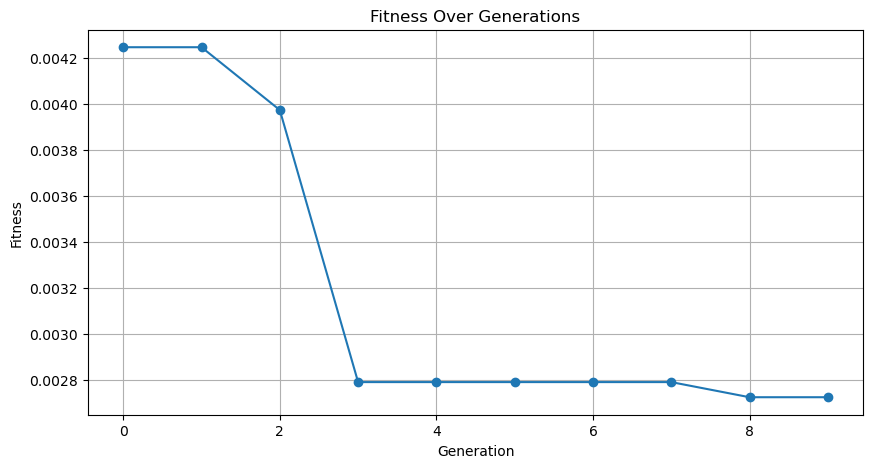

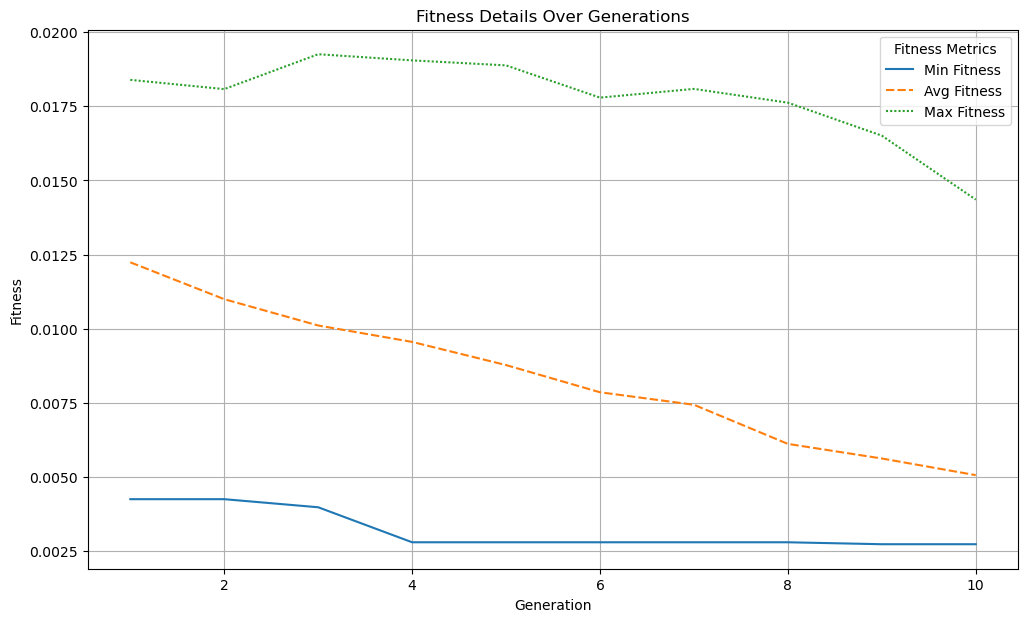

In [28]:
train_C_GA6 = Set_N_GA.main(df_train, columns, config_GA, population, 6)

## GA7

In [ ]:
#train_C_GA7 = Set_N_GA.main(df_train, columns, config_GA, 7)

## GA8

In [ ]:
#train_C_GA8 = Set_N_GA.main(df_train, columns, config_GA, 8)

## GA9

In [ ]:
#train_C_GA9 = Set_N_GA.main(df_train, columns, config_GA, 9)

## GA10

In [ ]:
#train_C_GA10 = Set_N_GA.main(df_train, columns, config_GA, 10)

# Complexity Measures

In [29]:
import Complexity

In [30]:


X1 = df_train.drop(columns=['class_label']).values.tolist()
y1 = df_train['class_label'].values.tolist()

X2 = train_C_random.drop(columns=['class_label']).values.tolist()
y2 = train_C_random['class_label'].values.tolist()

X3 = train_C_weighted.drop(columns=['class_label']).values.tolist()
y3 = train_C_weighted['class_label'].values.tolist()

X4 = train_C_GA1.drop(columns=['class_label']).values.tolist()
y4 = train_C_GA1['class_label'].values.tolist()

X5 = train_C_GA2.drop(columns=['class_label']).values.tolist()
y5 = train_C_GA2['class_label'].values.tolist()

X6 = train_C_GA3.drop(columns=['class_label']).values.tolist()
y6 = train_C_GA3['class_label'].values.tolist()

X7 = train_C_GA4.drop(columns=['class_label']).values.tolist()
y7 = train_C_GA4['class_label'].values.tolist()

X8 = train_C_GA5.drop(columns=['class_label']).values.tolist()
y8 = train_C_GA5['class_label'].values.tolist()

X9 = train_C_GA6.drop(columns=['class_label']).values.tolist()
y9 = train_C_GA6['class_label'].values.tolist()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Example usage:
datasets = [
    {"X": X1, "y": y1, "name": "Original Dataset"},
    {"X": X2, "y": y2, "name": "Random Concatenation"},
    {"X": X3, "y": y3, "name": "Weighted Concatenation"},
    {"X": X4, "y": y4, "name": "GA1"},
    {"X": X5, "y": y5, "name": "GA2"},
    {"X": X6, "y": y6, "name": "GA3"},
    {"X": X7, "y": y7, "name": "GA4"},
    {"X": X8, "y": y8, "name": "GA5"},
    {"X": X9, "y": y9, "name": "GA6"},
]

measures = ["Adapted_N1", "Adapted_N2", "Adapted_N3", "Adapted_CM"]

minority_measures = {measure: [] for measure in measures}
majority_measures = {measure: [] for measure in measures}



In [32]:
for dataset in datasets:
    complexity = Complexity.Complexity(dataset["X"], dataset["y"],distance_func="euclidean")

    n1_adapted = complexity.N1_adapted()
    minority_measures["Adapted_N1"].append(n1_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N1"].append(n1_adapted[np.argmax(complexity.class_count)])

    n2_adapted = complexity.N2_adapted()
    minority_measures["Adapted_N2"].append(n2_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N2"].append(n2_adapted[np.argmax(complexity.class_count)])
    
    n3_adapted = complexity.N3_adapted()
    minority_measures["Adapted_N3"].append(n3_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N3"].append(n3_adapted[np.argmax(complexity.class_count)])
    
    cm_adapted = complexity.CM_adapted()
    minority_measures["Adapted_CM"].append(cm_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_CM"].append(cm_adapted[np.argmax(complexity.class_count)])
    print('dataset["X"]')

dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]


In [57]:
epsilon = 0.0002
for i in range(len(majority_measures['Adapted_N3'])):
    if majority_measures['Adapted_N3'][i] == 0 :
        majority_measures['Adapted_N3'][i] = epsilon

In [53]:
ep = 0.00025
for c in majority_measures :
    for i in range(len(majority_measures[c])):
        if majority_measures[c][i] == 0 :
            majority_measures[c][i] = ep

                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N1    1.019231  Minority
1         Original Dataset  Adapted_N1    0.043537  Majority
2     Random Concatenation  Adapted_N1    0.001500  Minority
3     Random Concatenation  Adapted_N1    0.025034  Majority
4   Weighted Concatenation  Adapted_N1    0.001500  Minority
5   Weighted Concatenation  Adapted_N1    0.025034  Majority
6                      GA1  Adapted_N1    0.001500  Minority
7                      GA1  Adapted_N1    0.002449  Majority
8                      GA2  Adapted_N1    0.001500  Minority
9                      GA2  Adapted_N1    0.007347  Majority
10                     GA3  Adapted_N1    0.001500  Minority
11                     GA3  Adapted_N1    0.001905  Majority
12                     GA4  Adapted_N1    0.001500  Minority
13                     GA4  Adapted_N1    0.002449  Majority
14                     GA5  Adapted_N1    0.001500  Minority
15                     G

/tmp/ipykernel_11488/959498395.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


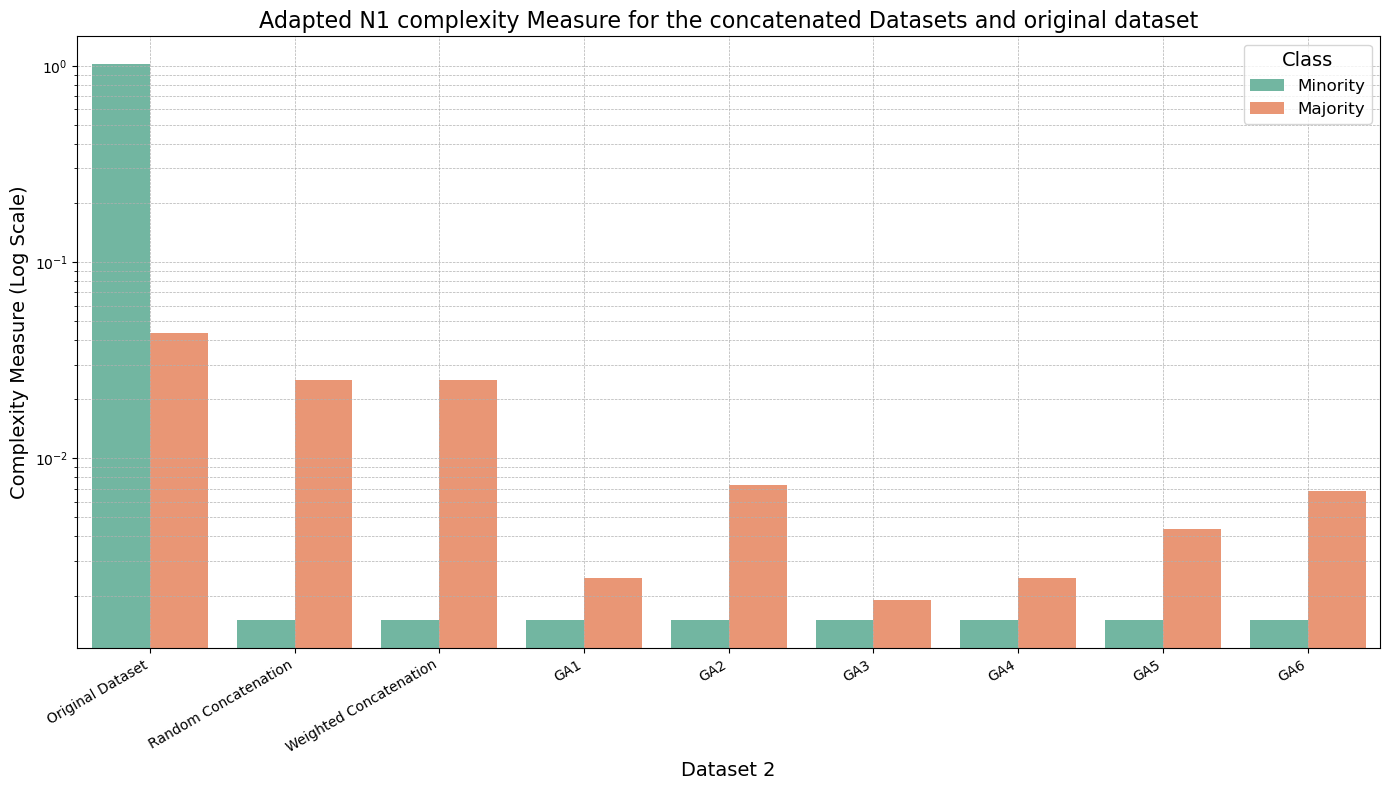

In [49]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[0], 'Complexity': minority_measures[measures[0]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[0], 'Complexity': majority_measures[measures[0]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N1 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 2', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N2    1.391624  Minority
1         Original Dataset  Adapted_N2    0.481099  Majority
2     Random Concatenation  Adapted_N2    0.086663  Minority
3     Random Concatenation  Adapted_N2    0.086478  Majority
4   Weighted Concatenation  Adapted_N2    0.084562  Minority
5   Weighted Concatenation  Adapted_N2    0.044947  Majority
6                      GA1  Adapted_N2    0.031654  Minority
7                      GA1  Adapted_N2    0.027524  Majority
8                      GA2  Adapted_N2    0.081232  Minority
9                      GA2  Adapted_N2    0.028777  Majority
10                     GA3  Adapted_N2    0.032631  Minority
11                     GA3  Adapted_N2    0.056523  Majority
12                     GA4  Adapted_N2    0.019774  Minority
13                     GA4  Adapted_N2    0.036160  Majority
14                     GA5  Adapted_N2    0.060063  Minority
15                     G

/tmp/ipykernel_11488/3337571896.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


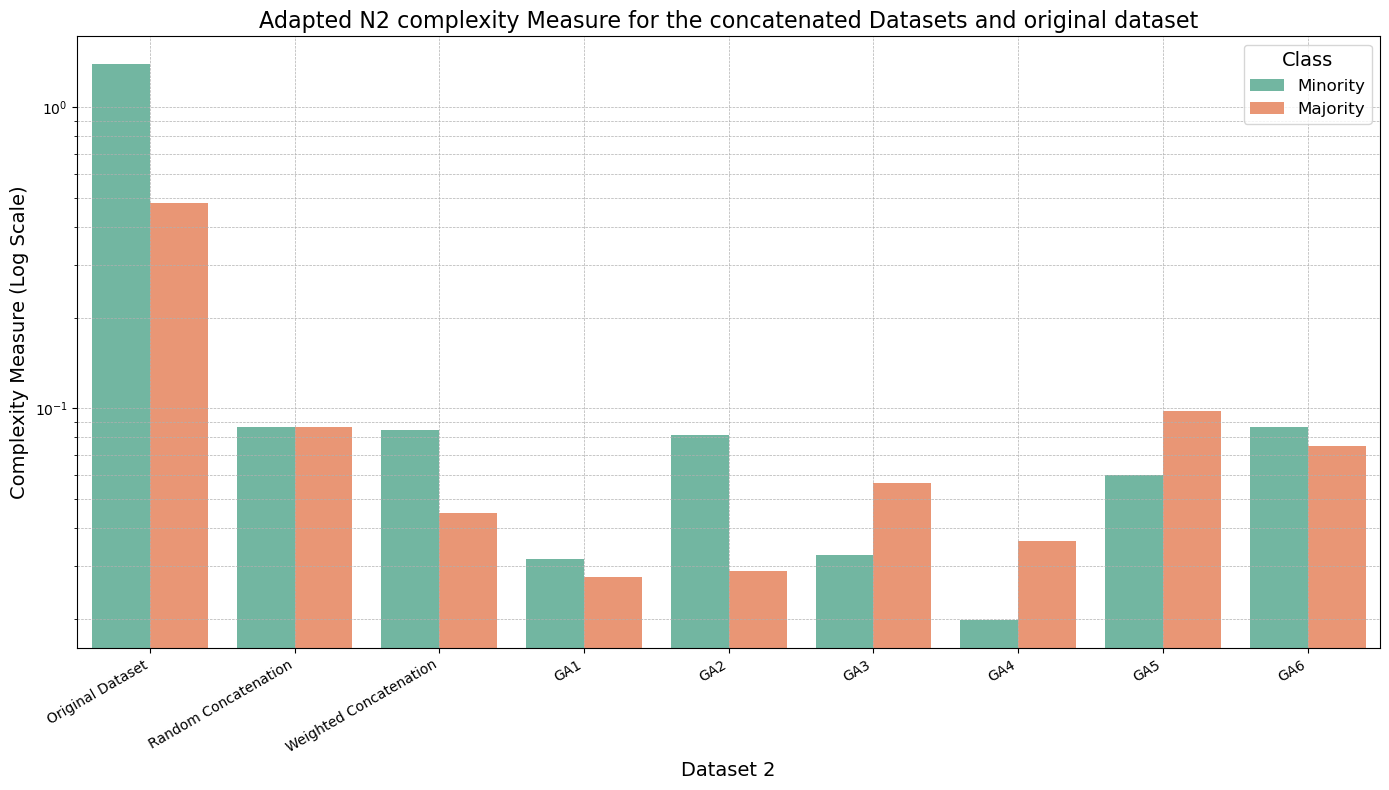

In [50]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[1], 'Complexity': minority_measures[measures[1]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[1], 'Complexity': majority_measures[measures[1]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N2 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 2', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N3    0.903846  Minority
1         Original Dataset  Adapted_N3    0.046259  Majority
2     Random Concatenation  Adapted_N3    0.001109  Minority
3     Random Concatenation  Adapted_N3    0.003265  Majority
4   Weighted Concatenation  Adapted_N3    0.002589  Minority
5   Weighted Concatenation  Adapted_N3    0.000544  Majority
6                      GA1  Adapted_N3    0.000370  Minority
7                      GA1  Adapted_N3    0.000200  Majority
8                      GA2  Adapted_N3    0.000370  Minority
9                      GA2  Adapted_N3    0.000200  Majority
10                     GA3  Adapted_N3    0.000370  Minority
11                     GA3  Adapted_N3    0.000200  Majority
12                     GA4  Adapted_N3    0.000370  Minority
13                     GA4  Adapted_N3    0.000200  Majority
14                     GA5  Adapted_N3    0.000200  Minority
15                     G

/tmp/ipykernel_11488/2997917414.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


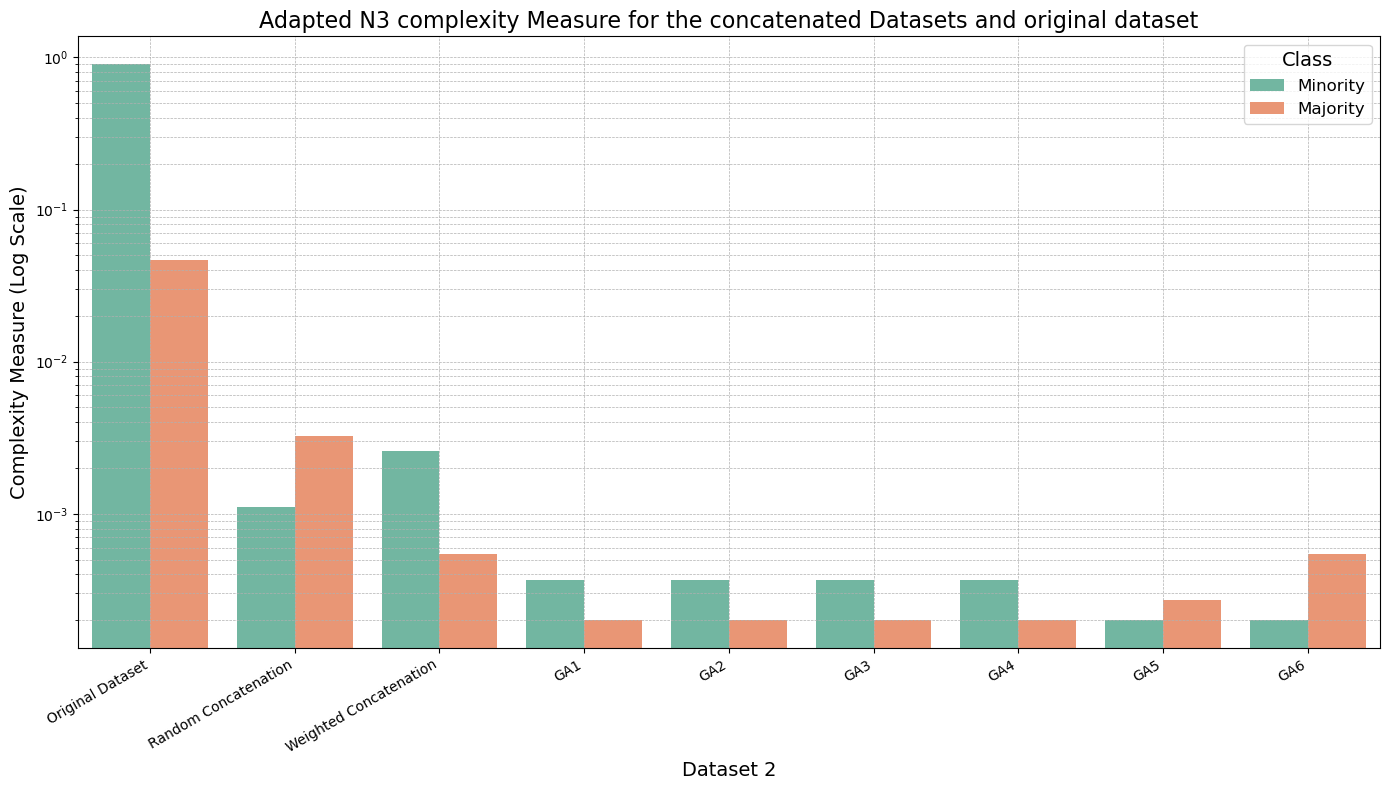

In [58]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[2], 'Complexity': minority_measures[measures[2]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[2], 'Complexity': majority_measures[measures[2]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N3 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 2', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_CM    1.000000  Minority
1         Original Dataset  Adapted_CM    0.182313  Majority
2     Random Concatenation  Adapted_CM    0.023299  Minority
3     Random Concatenation  Adapted_CM    0.030748  Majority
4   Weighted Concatenation  Adapted_CM    0.019231  Minority
5   Weighted Concatenation  Adapted_CM    0.025578  Majority
6                      GA1  Adapted_CM    0.000740  Minority
7                      GA1  Adapted_CM    0.001088  Majority
8                      GA2  Adapted_CM    0.002959  Minority
9                      GA2  Adapted_CM    0.005170  Majority
10                     GA3  Adapted_CM    0.000740  Minority
11                     GA3  Adapted_CM    0.001361  Majority
12                     GA4  Adapted_CM    0.001109  Minority
13                     GA4  Adapted_CM    0.000816  Majority
14                     GA5  Adapted_CM    0.003698  Minority
15                     G

/tmp/ipykernel_11488/1820427090.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


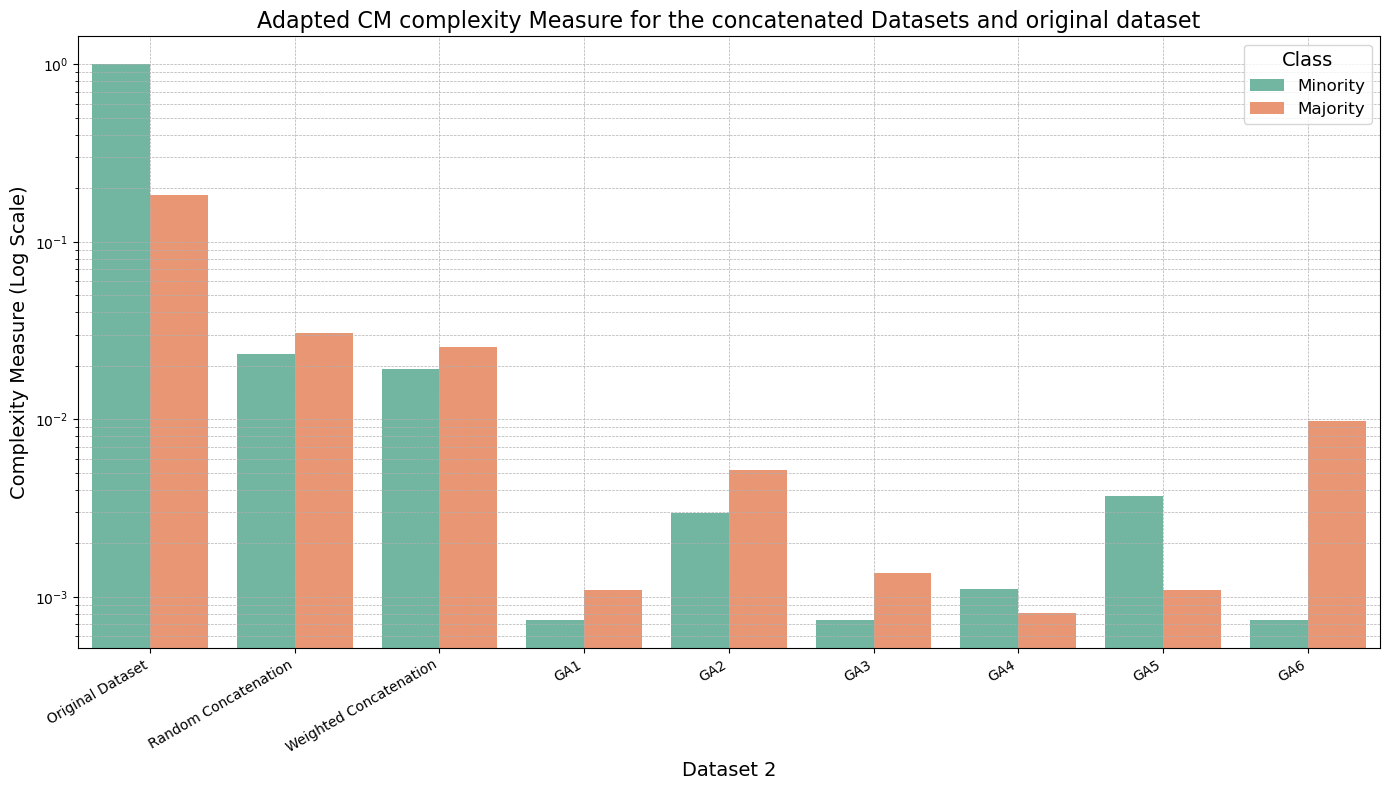

In [59]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[3], 'Complexity': minority_measures[measures[3]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[3], 'Complexity': majority_measures[measures[3]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted CM complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 2', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


# MLP Evaluation

In [48]:
config = {
    'k_folds': 10,
    'random_seed': 42,
    'batch_size': 32,
    'learning_rate': 0.001,
    'num_epochs': 50,
    'early_stopping_patience': 5
}

In [49]:
#import MLP_6
import MLP_13
#import MLP_model

In [50]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [51]:
device

device(type='cuda')

In [52]:
MLP_13.main(df_train, config)

2024-05-28 16:55:19,819 - INFO - Starting repeat 1 of 10
2024-05-28 16:57:34,784 - INFO - Early stopping at epoch 46
2024-05-28 16:57:35,143 - INFO - Early stopping at epoch 7
2024-05-28 16:57:35,383 - INFO - Early stopping at epoch 5
2024-05-28 16:57:37,278 - INFO - Early stopping at epoch 5
2024-05-28 16:57:38,151 - INFO - Early stopping at epoch 24
2024-05-28 16:57:39,126 - INFO - Early stopping at epoch 28
2024-05-28 16:57:40,773 - INFO - Early stopping at epoch 46
2024-05-28 16:57:43,071 - INFO - Early stopping at epoch 48
2024-05-28 16:57:44,587 - INFO - Early stopping at epoch 40
2024-05-28 16:57:44,587 - INFO - Experiment Average Metrics: {'accuracy': 0.8669304312378747, 'f1': 0.10003504490171647, 'recall': 0.1684108695652174, 'roc_auc': 0.5367276433989507, 'g_mean': 0.20406352084708645}
2024-05-28 16:57:44,588 - INFO - Experiment Train Losses: 12.390912816710777
2024-05-28 16:57:44,589 - INFO - Experiment Validation Losses: 6.97813859154715
2024-05-28 16:57:44,589 - INFO - Sta

{'accuracy': 0.889551073559373,
 'f1': 0.06408837445032857,
 'recall': 0.08465123785644328,
 'roc_auc': 0.529597327776769,
 'g_mean': 0.12797388593545184}

In [53]:
MLP_13.main(train_C_random, config)

2024-05-28 17:01:49,097 - INFO - Starting repeat 1 of 10
2024-05-28 17:01:59,570 - INFO - Early stopping at epoch 45
2024-05-28 17:02:10,232 - INFO - Early stopping at epoch 47
2024-05-28 17:02:19,017 - INFO - Early stopping at epoch 43
2024-05-28 17:02:26,683 - INFO - Early stopping at epoch 34
2024-05-28 17:02:34,066 - INFO - Early stopping at epoch 33
2024-05-28 17:02:41,850 - INFO - Early stopping at epoch 38
2024-05-28 17:02:51,880 - INFO - Early stopping at epoch 46
2024-05-28 17:02:57,183 - INFO - Early stopping at epoch 23
2024-05-28 17:03:04,939 - INFO - Early stopping at epoch 35
2024-05-28 17:03:11,739 - INFO - Early stopping at epoch 31
2024-05-28 17:03:11,741 - INFO - Experiment Average Metrics: {'accuracy': 0.8848239586607521, 'f1': 0.8540661292479985, 'recall': 0.7884602531799713, 'roc_auc': 0.9294620457378935, 'g_mean': 0.8669705004576185}
2024-05-28 17:03:11,741 - INFO - Experiment Train Losses: 1.9811102824510614
2024-05-28 17:03:11,741 - INFO - Experiment Validation 

{'accuracy': 0.8813649660575743,
 'f1': 0.8469520841201407,
 'recall': 0.7747710670248483,
 'roc_auc': 0.9302882724145445,
 'g_mean': 0.8609503687509452}

In [54]:
MLP_13.main(train_C_weighted, config)

2024-05-28 17:15:19,055 - INFO - Starting repeat 1 of 10
2024-05-28 17:15:30,510 - INFO - Early stopping at epoch 45
2024-05-28 17:15:34,579 - INFO - Early stopping at epoch 18
2024-05-28 17:15:42,965 - INFO - Early stopping at epoch 37
2024-05-28 17:15:49,902 - INFO - Early stopping at epoch 36
2024-05-28 17:15:58,329 - INFO - Early stopping at epoch 38
2024-05-28 17:16:07,495 - INFO - Early stopping at epoch 41
2024-05-28 17:16:17,357 - INFO - Early stopping at epoch 44
2024-05-28 17:16:26,266 - INFO - Early stopping at epoch 40
2024-05-28 17:16:33,744 - INFO - Early stopping at epoch 39
2024-05-28 17:16:44,316 - INFO - Experiment Average Metrics: {'accuracy': 0.8533176080000698, 'f1': 0.8085657370730367, 'recall': 0.7281547282092812, 'roc_auc': 0.9187303667037467, 'g_mean': 0.8280958664844528}
2024-05-28 17:16:44,317 - INFO - Experiment Train Losses: 1.8183619146098164
2024-05-28 17:16:44,318 - INFO - Experiment Validation Losses: 0.4921498769916492
2024-05-28 17:16:44,318 - INFO - 

{'accuracy': 0.8545094508605031,
 'f1': 0.8084386160978256,
 'recall': 0.7237360136584744,
 'roc_auc': 0.9180875702125162,
 'g_mean': 0.8278439012111509}

In [55]:
MLP_13.main(train_C_GA1, config)

2024-05-28 17:28:32,667 - INFO - Starting repeat 1 of 10
2024-05-28 17:28:40,119 - INFO - Early stopping at epoch 43
2024-05-28 17:28:45,855 - INFO - Early stopping at epoch 33
2024-05-28 17:29:00,798 - INFO - Early stopping at epoch 37
2024-05-28 17:29:08,336 - INFO - Early stopping at epoch 42
2024-05-28 17:29:13,137 - INFO - Early stopping at epoch 28
2024-05-28 17:29:18,322 - INFO - Early stopping at epoch 31
2024-05-28 17:29:23,635 - INFO - Early stopping at epoch 31
2024-05-28 17:29:29,225 - INFO - Early stopping at epoch 33
2024-05-28 17:29:33,253 - INFO - Early stopping at epoch 24
2024-05-28 17:29:33,254 - INFO - Experiment Average Metrics: {'accuracy': 0.9546267479535636, 'f1': 0.9449044453340495, 'recall': 0.9242167684516456, 'roc_auc': 0.9874669919120127, 'g_mean': 0.9495556984515394}
2024-05-28 17:29:33,254 - INFO - Experiment Train Losses: 2.2288750550757013
2024-05-28 17:29:33,255 - INFO - Experiment Validation Losses: 0.3674088638045674
2024-05-28 17:29:33,255 - INFO - 

{'accuracy': 0.954911560559423,
 'f1': 0.9447855151119116,
 'recall': 0.9208055313017988,
 'roc_auc': 0.9860980390589674,
 'g_mean': 0.9493796799294132}

In [56]:
MLP_13.main(train_C_GA2, config)

2024-05-28 17:37:28,625 - INFO - Starting repeat 1 of 10
2024-05-28 17:37:35,485 - INFO - Early stopping at epoch 41
2024-05-28 17:37:43,777 - INFO - Early stopping at epoch 49
2024-05-28 17:38:06,565 - INFO - Early stopping at epoch 41
2024-05-28 17:38:11,823 - INFO - Early stopping at epoch 31
2024-05-28 17:38:17,181 - INFO - Early stopping at epoch 31
2024-05-28 17:38:23,421 - INFO - Early stopping at epoch 37
2024-05-28 17:38:29,410 - INFO - Early stopping at epoch 35
2024-05-28 17:38:37,525 - INFO - Experiment Average Metrics: {'accuracy': 0.9061838003622837, 'f1': 0.8836662919935984, 'recall': 0.8637609442488152, 'roc_auc': 0.9649107581018754, 'g_mean': 0.8979690023665687}
2024-05-28 17:38:37,525 - INFO - Experiment Train Losses: 1.727245213690648
2024-05-28 17:38:37,525 - INFO - Experiment Validation Losses: 0.3935225246813988
2024-05-28 17:38:37,526 - INFO - Starting repeat 2 of 10
2024-05-28 17:38:49,846 - INFO - Early stopping at epoch 26
2024-05-28 17:39:01,891 - INFO - Earl

{'accuracy': 0.9060544221214806,
 'f1': 0.8827806018084562,
 'recall': 0.8585813159838085,
 'roc_auc': 0.9639263953019553,
 'g_mean': 0.8966530218065735}

In [57]:
MLP_13.main(train_C_GA3, config)

2024-05-28 17:48:35,798 - INFO - Starting repeat 1 of 10
2024-05-28 17:48:42,896 - INFO - Early stopping at epoch 43
2024-05-28 17:48:51,051 - INFO - Early stopping at epoch 49
2024-05-28 17:48:57,290 - INFO - Early stopping at epoch 38
2024-05-28 17:49:05,363 - INFO - Early stopping at epoch 49
2024-05-28 17:49:10,099 - INFO - Early stopping at epoch 28
2024-05-28 17:49:15,430 - INFO - Early stopping at epoch 32
2024-05-28 17:49:19,761 - INFO - Early stopping at epoch 26
2024-05-28 17:49:25,960 - INFO - Early stopping at epoch 37
2024-05-28 17:49:31,680 - INFO - Early stopping at epoch 35
2024-05-28 17:49:37,607 - INFO - Early stopping at epoch 37
2024-05-28 17:49:37,608 - INFO - Experiment Average Metrics: {'accuracy': 0.9564271537105832, 'f1': 0.9460939601964116, 'recall': 0.923558474812293, 'roc_auc': 0.9896339790205472, 'g_mean': 0.9510170598316592}
2024-05-28 17:49:37,608 - INFO - Experiment Train Losses: 1.647132090619654
2024-05-28 17:49:37,609 - INFO - Experiment Validation Lo

{'accuracy': 0.9547045478727217,
 'f1': 0.9445946869071256,
 'recall': 0.9245017452200376,
 'roc_auc': 0.9887012523408544,
 'g_mean': 0.9498000430554013}

In [58]:
MLP_13.main(train_C_GA4, config)

2024-05-28 17:58:44,601 - INFO - Starting repeat 1 of 10
2024-05-28 17:58:50,071 - INFO - Early stopping at epoch 32
2024-05-28 17:59:12,284 - INFO - Early stopping at epoch 34
2024-05-28 17:59:19,779 - INFO - Early stopping at epoch 45
2024-05-28 17:59:24,718 - INFO - Early stopping at epoch 29
2024-05-28 17:59:27,980 - INFO - Early stopping at epoch 19
2024-05-28 17:59:32,955 - INFO - Early stopping at epoch 29
2024-05-28 17:59:37,515 - INFO - Early stopping at epoch 27
2024-05-28 17:59:44,829 - INFO - Early stopping at epoch 44
2024-05-28 17:59:44,830 - INFO - Experiment Average Metrics: {'accuracy': 0.8919635101304315, 'f1': 0.8736959262231949, 'recall': 0.8756535359085479, 'roc_auc': 0.9616277236712909, 'g_mean': 0.8875615446053804}
2024-05-28 17:59:44,830 - INFO - Experiment Train Losses: 1.9309572532054076
2024-05-28 17:59:44,830 - INFO - Experiment Validation Losses: 0.43463837414540474
2024-05-28 17:59:44,830 - INFO - Starting repeat 2 of 10
2024-05-28 17:59:56,141 - INFO - Ea

{'accuracy': 0.8976327523748557,
 'f1': 0.8756109234632794,
 'recall': 0.8550286387130699,
 'roc_auc': 0.9611743776025867,
 'g_mean': 0.889075917246285}

In [59]:
MLP_13.main(train_C_GA5, config)

2024-05-28 18:09:06,079 - INFO - Starting repeat 1 of 10
2024-05-28 18:09:12,124 - INFO - Early stopping at epoch 36
2024-05-28 18:09:17,727 - INFO - Early stopping at epoch 34
2024-05-28 18:09:21,312 - INFO - Early stopping at epoch 21
2024-05-28 18:09:26,843 - INFO - Early stopping at epoch 34
2024-05-28 18:09:32,152 - INFO - Early stopping at epoch 32
2024-05-28 18:09:37,344 - INFO - Early stopping at epoch 31
2024-05-28 18:09:52,497 - INFO - Early stopping at epoch 41
2024-05-28 18:09:56,473 - INFO - Early stopping at epoch 24
2024-05-28 18:10:04,538 - INFO - Experiment Average Metrics: {'accuracy': 0.8744401104428077, 'f1': 0.8430703953035484, 'recall': 0.7996466474236592, 'roc_auc': 0.9546596883961147, 'g_mean': 0.8607188239376548}
2024-05-28 18:10:04,538 - INFO - Experiment Train Losses: 2.0096380821391597
2024-05-28 18:10:04,539 - INFO - Experiment Validation Losses: 0.4282009100369552
2024-05-28 18:10:04,539 - INFO - Starting repeat 2 of 10
2024-05-28 18:10:08,348 - INFO - Ear

{'accuracy': 0.8669726040638507,
 'f1': 0.8322073196287496,
 'recall': 0.7856386933732538,
 'roc_auc': 0.9490551338553055,
 'g_mean': 0.8511067653803659}

In [60]:
MLP_13.main(train_C_GA6, config)

2024-05-28 18:19:02,259 - INFO - Starting repeat 1 of 10
2024-05-28 18:19:07,916 - INFO - Early stopping at epoch 34
2024-05-28 18:19:10,931 - INFO - Early stopping at epoch 18
2024-05-28 18:19:22,443 - INFO - Early stopping at epoch 23
2024-05-28 18:19:27,131 - INFO - Early stopping at epoch 29
2024-05-28 18:19:31,440 - INFO - Early stopping at epoch 26
2024-05-28 18:19:34,820 - INFO - Early stopping at epoch 19
2024-05-28 18:19:37,779 - INFO - Early stopping at epoch 17
2024-05-28 18:19:43,720 - INFO - Early stopping at epoch 35
2024-05-28 18:19:48,965 - INFO - Early stopping at epoch 30
2024-05-28 18:19:48,966 - INFO - Experiment Average Metrics: {'accuracy': 0.9382667239640406, 'f1': 0.9246575426237481, 'recall': 0.8987273611098182, 'roc_auc': 0.9803783621282859, 'g_mean': 0.9313724143291522}
2024-05-28 18:19:48,967 - INFO - Experiment Train Losses: 3.119412183358801
2024-05-28 18:19:48,967 - INFO - Experiment Validation Losses: 0.40301330098526544
2024-05-28 18:19:48,967 - INFO - 

{'accuracy': 0.9467674407419798,
 'f1': 0.9337368774492067,
 'recall': 0.9020128191958275,
 'roc_auc': 0.9824384526241409,
 'g_mean': 0.9389747195441916}